In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

folder = ""

FARFIMA
========

In [2]:
data_t_max = pd.read_csv("results/"+folder+"FARIMA_t_max.csv")
data_t_max.sort_values(by=['t_max'], inplace=True)
data_t_max = data_t_max[ (data_t_max["t_max"]>=400) ]

data_n_grid = pd.read_csv("results/"+folder+"FARIMA_n_grid.csv")
n_grid_all = [101, 201, 501, 1001]
data_n_grid.sort_values(by=['n_grid'], inplace=True)
data_n_grid = data_n_grid[ data_n_grid.n_grid.isin(n_grid_all) ]

data_lags = pd.read_csv("results/"+folder+"FARIMA_lags.csv")

#methods = ["bm_sm","bm_spec","bm_hybrid", "eig_sm","eig_spec","eig_hybrid","lietal"]
methods = ["bm_sm","eig_sm","bm_hybrid","eig_hybrid","lietal"]
method_names = ["spectral (BM)","spectral (SVD)","hybrid (BM)","hybrid (SVD)","space"]
method_line = ["*:r","*-r","p:b","p-b","o-k"]
#["*-r","s-c","p-m","D-b","o-k"]



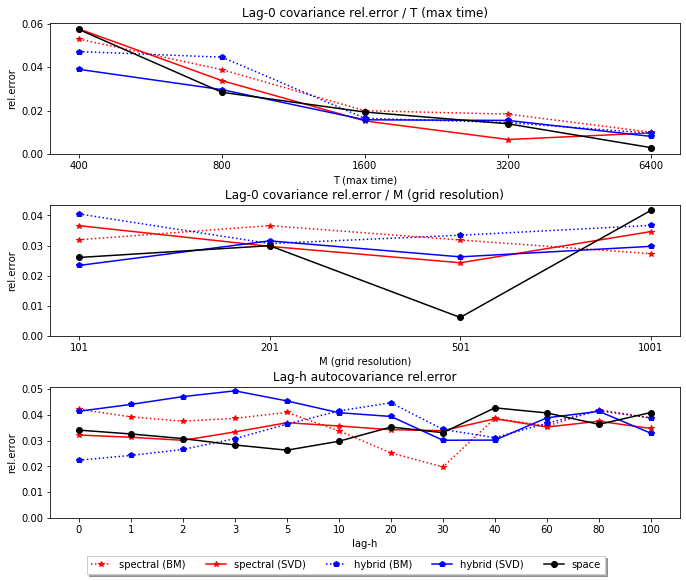

In [3]:

f, axarr = plt.subplots(3,1, figsize=(10,8))
f.tight_layout(pad=3.0)
# plt.margins(0.4,0.04)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

# t_max
for i in range(len(methods)):
    t_len = len(data_t_max.t_max[data_t_max.method==methods[i]])
    axarr[0].plot( range(t_len), data_t_max.rel_error_nuc[data_t_max.method==methods[i]],method_line[i] )
    #axarr[0].plot(data_t_max.t_max[data_t_max.method==methods[i]],
    #              data_t_max.rel_error_nuc[data_t_max.method==methods[i]],
    #              method_line[i])
axarr[0].set_title("Lag-0 covariance rel.error / T (max time)")
axarr[0].set_ylabel("rel.error")
axarr[0].set_xlabel("T (max time)")
axarr[0].set_xticks(range(t_len))
axarr[0].set_xticklabels(data_t_max.t_max.unique())
axarr[0].set_ylim(bottom=0)

# n_grid
for i in range(len(methods)):
    n_grid_len = len(data_n_grid.n_grid[data_n_grid.method==methods[i]])
    axarr[1].plot( range(n_grid_len), data_n_grid.rel_error_nuc[data_n_grid.method==methods[i]],method_line[i] )
#     axarr[1].plot(data_n_grid.n_grid[data_n_grid.method==methods[i]],
#                     data_n_grid.rel_error_nuc[data_n_grid.method==methods[i]],method_line[i] )
axarr[1].set_title("Lag-0 covariance rel.error / M (grid resolution)")
axarr[1].set_ylabel("rel.error")
axarr[1].set_xlabel("M (grid resolution)")
axarr[1].set_xticks(range(len(n_grid_all)))
axarr[1].set_xticklabels(data_n_grid.n_grid.unique())
axarr[1].set_ylim(bottom=0)



# lags
for i in range(len(methods)):
    axarr[2].plot( range(12), data_lags.rel_error_nuc[data_lags.method==methods[i]],method_line[i] )
axarr[2].set_title("Lag-h autocovariance rel.error")
axarr[2].set_ylabel("rel.error")
axarr[2].set_xlabel("lag-h")
axarr[2].set_ylim(bottom=0)
axarr[2].set_xticks(range(12))
axarr[2].set_xticklabels(data_lags.lag.unique())
# axarr[2].set_yticks( np.arange(0,0.14,0.02))


# # legend

axarr[2].legend(method_names,loc='upper center', bbox_to_anchor=(0.47, -0.25),
          fancybox=False, shadow=True, ncol=7)

f.savefig('FARIMA_nuc.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

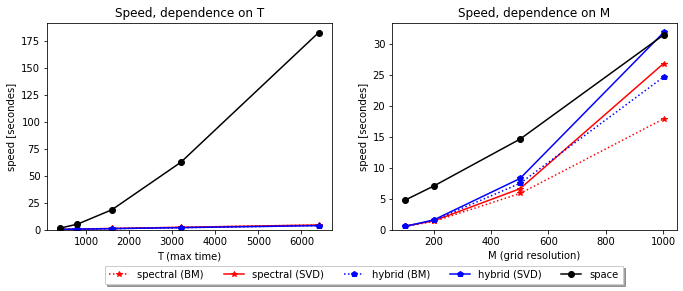

In [4]:
f, axarr = plt.subplots(1,2, figsize=(10,4))
f.tight_layout(pad=3.0)
# plt.margins(0.04,0.04)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())



# t_max
for i in range(len(methods)):
    axarr[0].plot(data_t_max.t_max[data_t_max.method==methods[i]],data_t_max.time[data_t_max.method==methods[i]],method_line[i])

axarr[0].set_title("Speed, dependence on T")
axarr[0].set_ylabel("speed [secondes]")
axarr[0].set_xlabel("T (max time)")
axarr[0].set_ylim(bottom=0)

# n_grid
for i in range(len(methods)):
    axarr[1].plot( data_n_grid.n_grid[data_n_grid.method==methods[i]], data_n_grid.time[data_n_grid.method==methods[i]],method_line[i] )    
axarr[1].set_title("Speed, dependence on M")
axarr[1].set_ylabel("speed [secondes]")
axarr[1].set_xlabel("M (grid resolution)")
axarr[1].set_ylim(bottom=0)


axarr[1].legend(method_names,loc='upper center', bbox_to_anchor=(-0.1, -0.15),
          fancybox=False, shadow=True, ncol=7)

f.savefig('FARIMA_speed.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

Low rank ARMA
================

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data_t_max = pd.read_csv("results/"+folder+"ARMA_lowrank_t_max.csv")
data_t_max.sort_values(by=['t_max'], inplace=True)
data_t_max = data_t_max[ (data_t_max["t_max"]>=400)  ]


data_n_grid = pd.read_csv("results/"+folder+"ARMA_lowrank_n_grid.csv")
n_grid_all = [101, 201, 501, 1001]
data_n_grid.sort_values(by=['n_grid'], inplace=True)
data_n_grid = data_n_grid[ data_n_grid.n_grid.isin(n_grid_all) ]
#data_n_grid = data_n_grid[ (data_n_grid["n_pc"]==100) or (data_n_grid["n_pc"]==-1) ]

data_lags = pd.read_csv("results/"+folder+"ARMA_lowrank_lags.csv")
#data_lags = data_lags[ (data_lags["n_pc"]==100) or (data_lags["n_pc"]==-1) ]

methods = ["lowrank_spec","svd_spec","lowrank_hybrid","svd_hybrid","space"]
method_names = ["spectral (lr)","spectral (SVD)","hybrid (lr)","hybrid (SVD)","space"] # ["hybrid spectral","space"]
method_line = ["*:r","*-r","p:b","p-b","o-k"]
lietal_color = "k"

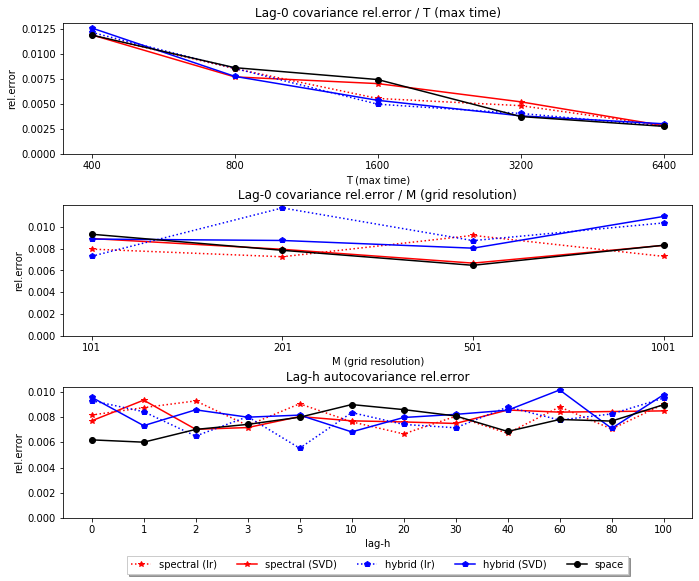

In [7]:
f, axarr = plt.subplots(3,1, figsize=(10,8))
f.tight_layout(pad=3.0)
# plt.margins(0.4,0.04)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

# t_max
for i in range(len(methods)):
    t_len = len(data_t_max.t_max[data_t_max.method==methods[i]])
    axarr[0].plot( range(t_len), data_t_max.rel_error_nuc[data_t_max.method==methods[i]],method_line[i] )
    #axarr[0].plot(data_t_max.t_max[data_t_max.method==methods[i]],
    #              data_t_max.rel_error_nuc[data_t_max.method==methods[i]],
    #              method_line[i])
axarr[0].set_title("Lag-0 covariance rel.error / T (max time)")
axarr[0].set_ylabel("rel.error")
axarr[0].set_xlabel("T (max time)")
axarr[0].set_xticks(range(t_len))
axarr[0].set_xticklabels(data_t_max.t_max.unique())
axarr[0].set_ylim(bottom=0)

# n_grid
for i in range(len(methods)):
    n_grid_len = len(data_n_grid.n_grid[data_n_grid.method==methods[i]])
    axarr[1].plot( range(n_grid_len), data_n_grid.rel_error_nuc[data_n_grid.method==methods[i]],method_line[i] )
#     axarr[1].plot(data_n_grid.n_grid[data_n_grid.method==methods[i]],
#                     data_n_grid.rel_error_nuc[data_n_grid.method==methods[i]],method_line[i] )
axarr[1].set_title("Lag-0 covariance rel.error / M (grid resolution)")
axarr[1].set_ylabel("rel.error")
axarr[1].set_xlabel("M (grid resolution)")
axarr[1].set_xticks(range(len(n_grid_all)))
axarr[1].set_xticklabels(data_n_grid.n_grid.unique())
axarr[1].set_ylim(bottom=0)


# lags
for i in range(len(methods)):
    axarr[2].plot( range(12), data_lags.rel_error_nuc[data_lags.method==methods[i]],method_line[i] )
axarr[2].set_title("Lag-h autocovariance rel.error")
axarr[2].set_ylabel("rel.error")
axarr[2].set_xlabel("lag-h")
axarr[2].set_ylim(bottom=0)
axarr[2].set_xticks(range(12))
axarr[2].set_xticklabels(data_lags.lag.unique())
# axarr[2].set_yticks( np.arange(0,0.14,0.02))


# # legend

axarr[2].legend(method_names[0:5],loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=False, shadow=True, ncol=5)

f.savefig('ARMA_nuc.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)

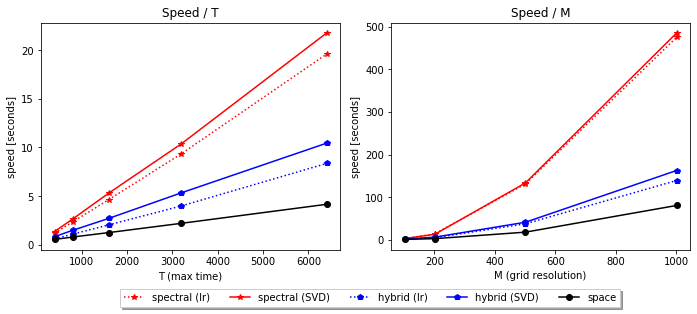

In [8]:
f, axarr = plt.subplots(1,2, figsize=(10,4))
f.tight_layout(pad=2.0)
# plt.margins(0.04,0.04)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())



# t_max
for i in range(len(methods)):
    axarr[0].plot(data_t_max.t_max[data_t_max.method==methods[i]], data_t_max.time[data_t_max.method==methods[i]],method_line[i])

axarr[0].set_title("Speed / T")
axarr[0].set_ylabel("speed [seconds]")
axarr[0].set_xlabel("T (max time)")
#axarr[0].set_ylim(bottom=0)

# n_grid
for i in range(len(methods)):
    axarr[1].plot( data_n_grid.n_grid[data_n_grid.method==methods[i]], data_n_grid.time[data_n_grid.method==methods[i]],method_line[i] )    
axarr[1].set_title("Speed / M")
axarr[1].set_ylabel("speed [seconds]")
axarr[1].set_xlabel("M (grid resolution)")
#axarr[1].set_ylim(bottom=0)

axarr[0].legend(method_names,loc='upper center', bbox_to_anchor=(1.1, -0.15),
          fancybox=False, shadow=True, ncol=5)

f.savefig('ARMA_speed.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0)